# Machine Learning
## After we crawled, extracted, processed and visualised the data, we are going to preform different machine learning algorithms 

#### Inital imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import datetime 
import sklearn

%matplotlib inline

In [2]:
games_df = pd.read_csv('games_table.csv',sep=',')
games_df.drop(['winner_id','p1_id','p2_id','diff_win','points_diff','p1_sets','p2_sets','Unnamed: 0','match_id',
               'match_type','date','p1_name','p2_name','p1_club','p2_club','p1_points_gained','p2_points_gained'],axis=1,inplace=True)
games_df


,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,p1_win,p2_win
0,1778.3,0.0,1430.4,1.0,16,0,7.5,24.5,0,1
1,1778.3,1.0,1412.8,0.0,6,0,-12.0,16.5,1,0
2,1778.3,1.0,1350.0,0.0,3,0,-10.5,8.5,1,0
3,1778.3,1.0,1099.8,0.0,2,0,-16.5,0.0,1,0
4,1778.3,1.0,1522.8,0.0,0,0,3.0,10.4,0,1
...,...,...,...,...,...,...,...,...,...,...
27311,668.6,0.0,669.1,1.0,0,0,2.0,-21.0,0,1
27312,668.6,0.0,928.9,1.0,0,0,1.0,24.0,0,1
27313,668.6,1.0,749.7,0.0,1,0,-1.0,12.0,1,0
27314,668.6,0.0,574.4,1.0,0,0,-8.0,0.0,1,0


In [3]:
games_df.fillna(0,inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27316 entries, 0 to 27315
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p1_rank      27316 non-null  float64
 1   p1_home      27316 non-null  float64
 2   p2_rank      27316 non-null  float64
 3   p2_home      27316 non-null  float64
 4   p1_prevwins  27316 non-null  int64  
 5   p2_prevwins  27316 non-null  int64  
 6   p1_form      27316 non-null  float64
 7   p2_form      27316 non-null  float64
 8   p1_win       27316 non-null  int64  
 9   p2_win       27316 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


### At this point we only need these specific columns:
#### p1_rank, p1_home, p2_rank, p2_home, p1_prevwins, p2_prevwins, p1_form, p2_form, p1_win, p2_win

In [4]:
games_df['is_p1_win'] = games_df['p1_win']
games_df.drop(['p1_win','p2_win'],axis=1,inplace=True)

In [5]:
games_df

,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,is_p1_win
0,1778.3,0.0,1430.4,1.0,16,0,7.5,24.5,0
1,1778.3,1.0,1412.8,0.0,6,0,-12.0,16.5,1
2,1778.3,1.0,1350.0,0.0,3,0,-10.5,8.5,1
3,1778.3,1.0,1099.8,0.0,2,0,-16.5,0.0,1
4,1778.3,1.0,1522.8,0.0,0,0,3.0,10.4,0
...,...,...,...,...,...,...,...,...,...
27311,668.6,0.0,669.1,1.0,0,0,2.0,-21.0,0
27312,668.6,0.0,928.9,1.0,0,0,1.0,24.0,0
27313,668.6,1.0,749.7,0.0,1,0,-1.0,12.0,1
27314,668.6,0.0,574.4,1.0,0,0,-8.0,0.0,1


In [6]:
X = games_df.drop('is_p1_win',axis=1)
y = games_df['is_p1_win']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression
#### The first model we will use

In [10]:
from sklearn.linear_model import LogisticRegressionCV

In [11]:
lg_model = LogisticRegressionCV()
lg_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

Let's see the preformance evaluation of the first model

In [12]:
predictions = lg_model.predict(scaled_X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

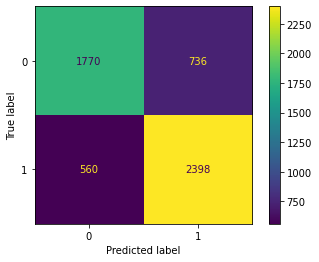

In [14]:
plot_confusion_matrix(lg_model,scaled_X_test,y_test)

In [15]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2330
           1       0.81      0.77      0.79      3134

    accuracy                           0.76      5464
   macro avg       0.76      0.76      0.76      5464
weighted avg       0.77      0.76      0.76      5464



In [16]:
lg_model.coef_

array([[ 1.67211128,  0.06352556, -1.84667761, -0.01069946,  0.15030156,
        -0.13724745,  0.23407676, -0.22280752]])

## Random Forest
#### The second model we will use

In [17]:
rf_df =games_df.copy()

rf_df['diff'] = rf_df['p1_rank'] -  rf_df['p2_rank']
rf_df

,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,is_p1_win,diff
0,1778.3,0.0,1430.4,1.0,16,0,7.5,24.5,0,347.9
1,1778.3,1.0,1412.8,0.0,6,0,-12.0,16.5,1,365.5
2,1778.3,1.0,1350.0,0.0,3,0,-10.5,8.5,1,428.3
3,1778.3,1.0,1099.8,0.0,2,0,-16.5,0.0,1,678.5
4,1778.3,1.0,1522.8,0.0,0,0,3.0,10.4,0,255.5
...,...,...,...,...,...,...,...,...,...,...
27311,668.6,0.0,669.1,1.0,0,0,2.0,-21.0,0,-0.5
27312,668.6,0.0,928.9,1.0,0,0,1.0,24.0,0,-260.3
27313,668.6,1.0,749.7,0.0,1,0,-1.0,12.0,1,-81.1
27314,668.6,0.0,574.4,1.0,0,0,-8.0,0.0,1,94.2


In [18]:
rf_df = rf_df[((rf_df['diff']>=-80) | ((rf_df['diff']<-80) & rf_df['is_p1_win'] == 0))]
rf_df


,p1_rank,p1_home,p2_rank,p2_home,p1_prevwins,p2_prevwins,p1_form,p2_form,is_p1_win,diff
0,1778.3,0.0,1430.4,1.0,16,0,7.5,24.5,0,347.9
1,1778.3,1.0,1412.8,0.0,6,0,-12.0,16.5,1,365.5
2,1778.3,1.0,1350.0,0.0,3,0,-10.5,8.5,1,428.3
3,1778.3,1.0,1099.8,0.0,2,0,-16.5,0.0,1,678.5
4,1778.3,1.0,1522.8,0.0,0,0,3.0,10.4,0,255.5
...,...,...,...,...,...,...,...,...,...,...
27310,686.6,1.0,707.5,0.0,0,0,5.0,-18.6,0,-20.9
27311,668.6,0.0,669.1,1.0,0,0,2.0,-21.0,0,-0.5
27312,668.6,0.0,928.9,1.0,0,0,1.0,24.0,0,-260.3
27314,668.6,0.0,574.4,1.0,0,0,-8.0,0.0,1,94.2


In [19]:
r_X = rf_df.drop('is_p1_win',axis=1)
r_y = rf_df['is_p1_win']


In [20]:

temp_x = r_X.copy()
temp_x['diff'] = temp_x['p1_rank'] - temp_x['p2_rank']
temp_x = temp_x[['diff','p1_form','p2_form','p1_prevwins','p2_prevwins']]


temp_x

,diff,p1_form,p2_form,p1_prevwins,p2_prevwins
0,347.9,7.5,24.5,16,0
1,365.5,-12.0,16.5,6,0
2,428.3,-10.5,8.5,3,0
3,678.5,-16.5,0.0,2,0
4,255.5,3.0,10.4,0,0
...,...,...,...,...,...
27310,-20.9,5.0,-18.6,0,0
27311,-0.5,2.0,-21.0,0,0
27312,-260.3,1.0,24.0,0,0
27314,94.2,-8.0,0.0,0,0


In [21]:
temp_y = r_y
temp_y

0        0
1        1
2        1
3        1
4        0
        ..
27310    0
27311    0
27312    0
27314    1
27315    0
Name: is_p1_win, Length: 25665, dtype: int64

In [22]:
scaler_temp = StandardScaler()
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(temp_x,temp_y,test_size=0.1)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=1500,max_features='auto')

In [25]:
rf_model.fit(X_temp_train,y_temp_train)

RandomForestClassifier(n_estimators=1500)

In [26]:
rf_predicitons = rf_model.predict(X_temp_test)

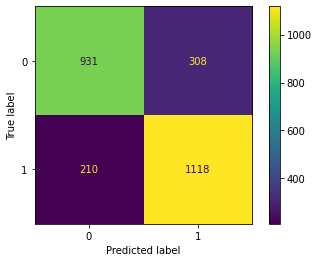

In [27]:
plot_confusion_matrix(rf_model,X_temp_test,y_temp_test)

In [28]:
confusion_matrix(y_temp_test,rf_predicitons)

array([[ 931,  308],
       [ 210, 1118]])

In [29]:
print(classification_report(rf_predicitons,y_temp_test))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1141
           1       0.84      0.78      0.81      1426

    accuracy                           0.80      2567
   macro avg       0.80      0.80      0.80      2567
weighted avg       0.80      0.80      0.80      2567



In [30]:
game = {
    "diff":[160],
    "p1_prevwins":[0],
    "p2_prevwins":[0],
    "p1_form":[0],
    "p2_form":[0],
}

df = pd.DataFrame.from_dict(game)
score = rf_model. predict(df)
score

array([1])

## Trying different approach

In [32]:
games_df = pd.read_csv('games_table.csv',sep=',')
games_df.fillna(0,inplace=True)
games_df['is_p1_win'] = games_df['p1_win']

In [33]:
X2 = games_df[['points_diff','p1_prevwins','p2_prevwins']]
y2 = games_df['is_p1_win']
scaler2 = StandardScaler()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.1,random_state=42)

In [35]:

scaled_X_train2 = scaler2.fit_transform(X_train2)
scaled_X_test2 = scaler2.transform(X_test2)

In [36]:
lg_model2 = LogisticRegressionCV()

In [37]:
lg_model2.fit(scaled_X_train2,y_train2)

LogisticRegressionCV()

In [38]:
predictions2 = lg_model2.predict(scaled_X_test2)

In [39]:
confusion_matrix(predictions2,y_test2)

array([[ 866,  284],
       [ 366, 1216]])

In [40]:
print(classification_report(predictions2,y_test2))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1150
           1       0.81      0.77      0.79      1582

    accuracy                           0.76      2732
   macro avg       0.76      0.76      0.76      2732
weighted avg       0.77      0.76      0.76      2732



## SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(class_weight='balanced')

In [43]:
from sklearn.model_selection import GridSearchCV


In [44]:
params = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

In [45]:
grid = GridSearchCV(svc,params)

In [46]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [47]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [48]:
svm_predictions = grid.predict(scaled_X_test)

In [49]:
confusion_matrix(svm_predictions,y_test)

array([[1857,  632],
       [ 649, 2326]])

In [50]:
print(classification_report(svm_predictions,y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2489
           1       0.79      0.78      0.78      2975

    accuracy                           0.77      5464
   macro avg       0.76      0.76      0.76      5464
weighted avg       0.77      0.77      0.77      5464



## Adaptive Boost Model

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ad_model = AdaBoostClassifier(n_estimators=1000)

In [53]:
ad_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1000)

In [54]:
ad_predictions = ad_model.predict(X_test)

In [55]:
confusion_matrix(ad_predictions,y_test)

array([[1779,  567],
       [ 727, 2391]])

In [56]:
print(classification_report(ad_predictions,y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2346
           1       0.81      0.77      0.79      3118

    accuracy                           0.76      5464
   macro avg       0.76      0.76      0.76      5464
weighted avg       0.77      0.76      0.76      5464



#### Saving the model in order to use in our app

In [59]:
#import joblib
#joblib.dump(rf_model, 'rf_model.pkl',compress=9)